# EDA(Exploratorty Data Anaysis) 탐색적 데이터 분석 

In [2]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
import numpy as np

## 데이터 (jeju_place.xlsx)

- 제주도 데이터 

### 데이터 불러오기

In [5]:
place = pd.read_excel('jeju_place.xlsx')

In [ ]:
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [ ]:
place.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주특별자치도,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899
499,500,쇠와꽃승마장,제주특별자치도,서귀포시,제주 서귀포시 섭지코지로25번길 88-17,레저스포츠,육상레저스포츠,1895


### 데이터 정보 확인 


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
place.describe()

,순위,검색건수
count,500.000000,500.0000
mean,250.472000,18153.8080
std,144.450064,46217.1129
min,1.000000,1895.0000
25%,125.750000,3565.0000
50%,250.500000,6894.5000
75%,375.250000,14538.2500
max,500.000000,803524.0000


In [ ]:
# null 값 확인
place.isna().sum()

관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

### 데이터 전처리 

In [6]:
# 인덱스 설정 
place = place.set_index('순위')

In [7]:
# 광역시/도 컬럼을 삭제.

place = place.drop('광역시/도', axis=1)

In [ ]:
place

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


### 데이터 탐색 


In [ ]:
# 중분류 카테고리 중 어떤 카테고리가 가장 많은지?

place['중분류 카테고리'].value_counts()

# 자연관광이 가장 많고, 그 다음으로는 문화관광 등등이 있다.

자연관광     138
문화관광     137
기타관광      94
레저스포츠     79
쇼핑        31
역사관광      14
체험관광       7
Name: 중분류 카테고리, dtype: int64

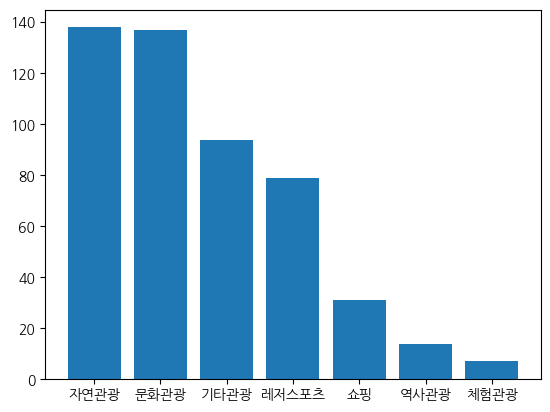

In [ ]:
# 중분류 카테고리들의 빈도수 시각화

mid_cat = place['중분류 카테고리'].value_counts()

plt.bar(mid_cat.index, mid_cat)
plt.show()

# 시각적으로 자연관광이 제일 많고, 그 다음으로 문화관광, 기타관광 등등으로 있다.

In [ ]:
# 소분류 카테고리 중 어떤 카테고리가 가장 많은지?

place['소분류 카테고리'].value_counts()

# 자연경관 > 기타관광 > 전시시설 > ... 

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

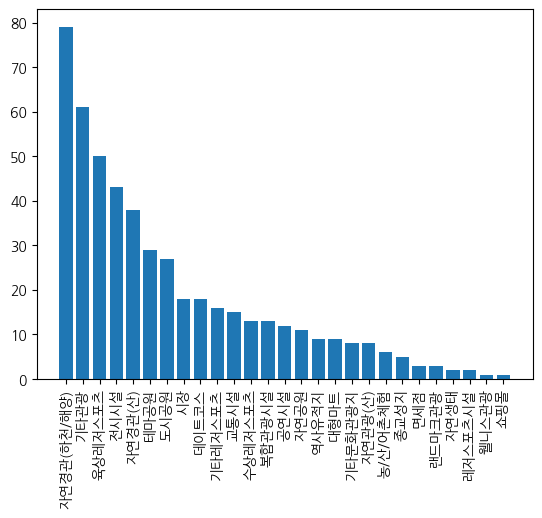

In [ ]:
# 소분류 카테고리들의 시각화

low_cat = place['소분류 카테고리'].value_counts()

plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90)
plt.show()

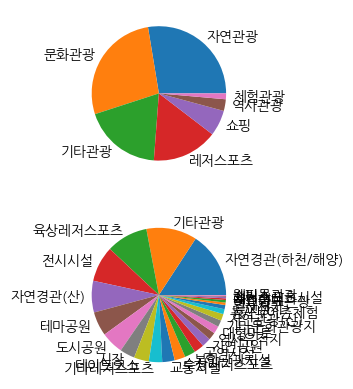

In [ ]:
# 파이 차트: 전체에서 부분이 어느정도 차지하고 있는지
# 중분류와 소분류를 파이차이를 통해 시각화.

# 중분류

plt.subplot(2, 1, 1)
plt.pie(mid_cat, labels=mid_cat.index)

# 소분류

plt.subplot(2, 1, 2)
plt.pie(low_cat, labels=low_cat.index)


plt.show()

In [ ]:
# 소분류 카테고리 상위 10개 

low_cat.head(10)

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64

In [ ]:
# 소분류 카테고리 상위 10개를 데이터 프레임으로 만들기
# to_frame()
place['소분류 카테고리'].value_counts().head(10).to_frame()

,소분류 카테고리
자연경관(하천/해양),79
기타관광,61
육상레저스포츠,50
전시시설,43
자연경관(산),38
테마공원,29
도시공원,27
시장,18
데이트코스,18
기타레저스포츠,16


In [11]:
# 소분류 카테고리 상위 10개에 포함되는 전체 데이터 
# 즉 소분류 카테고리에 상위 10개의 카테고리가 있는 데이터 

place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:11].index)]

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
491,새미은총의동산,제주시,제주 제주시,문화관광,도시공원,1936
492,금능해안도로,제주시,제주 제주시,기타관광,데이트코스,1923
495,조천만세동산,제주시,제주 제주시,문화관광,도시공원,1913


In [ ]:
# 전체 데이터에서 중분류 카테고리가 상위 10개인 데이터는?

place[place['중분류 카테고리'].isin(place['중분류 카테고리'].value_counts().head(10).index)]

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [ ]:
# 소분류 카테고리 > 자연경관 
# 자연경관만 추출.

nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature.head()

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488


In [ ]:
# 자연경관의 총 검색건수 
nature['검색건수'].sum()

# 총 1,742,995 건입니다.

1742995

In [ ]:
# 자연경관에서 사람들이 사용하거나 놀 수 있는 공간만 제외하고 나머지 데이터는 삭제.

nature

# 1. 관광지명에 항, 포구, 염전, 부두, 저수지, 방파제 포함되어있는 관광지명을 삭제.
print(nature['관광지명'].unique())

['함덕해수욕장' '협재해수욕장' '이호테우해변' '곽지해수욕장' '김녕해수욕장' '금능해수욕장' '중문색달해변' '월정리해변'
 '표선해수욕장' '성산항' '광치기해변' '사계해수욕장' '세화해수욕장' '운진항' '판포포구' '모슬포항' '제주항제6부두'
 '삼양해수욕장' '제주항제4부두' '애월항' '황우지해안' '화순금모래해변' '법환포구' '한담해변' '하우목동항' '한림항'
 '홍조단괴해빈' '논짓물' '검멀레해수욕장' '도두항' '천진항' '구엄리돌염전' '서귀포항' '위미항' '하도해수욕장'
 '평대리해수욕장' '신양섭지해수욕장' '코난비치' '비양도' '오조포구' '제주항제2부두' '제주항제3부두' '보목포구'
 '신창풍차해안' '가파도' '화순항' '하고수동해수욕장' '대평포구' '사계항' '차귀도' '신도포구' '강정포구' '코난해변'
 '용수리포구' '제주항제9부두' '월령포구' '자구내포구' '구엄포구' '종달리해변' '제주항제7부두' '하모해수욕장'
 '세기알해변' '고내포구' '차귀도포구' '쇠소깍해변' '월평포구' '대포포구' '남원포구' '신흥해수욕장' '영락리방파제'
 '용담포구' '소금막해변' '수산저수지' '신창항' '하효항' '구두미포구' '제주항' '김녕포구' '동일리포구']


In [ ]:
# 항이 포함된 열을 삭제 

nature = nature.drop(labels=nature[nature['관광지명'].str[-1]=='항'].index, axis=0)

# 포구가 포함된 열을 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]=='포구'].index, axis=0)

# 염전
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '염전'].index, axis=0)
# 부두
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '부두'].index, axis=0)

# 저수지
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '저수지'].index, axis=0)

# 방파제 
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '방파제'].index, axis=0)


In [ ]:
nature['관광지명'].unique()


array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '삼양해수욕장',
       '황우지해안', '화순금모래해변', '한담해변', '홍조단괴해빈', '논짓물', '검멀레해수욕장', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '신창풍차해안', '가파도', '하고수동해수욕장',
       '차귀도', '코난해변', '종달리해변', '하모해수욕장', '세기알해변', '쇠소깍해변', '신흥해수욕장',
       '소금막해변'], dtype=object)

In [ ]:
# 정리된 nature 데이터 
# nature 데이터 중 검색량의 이상치를 판별하여
# 이상치는 교통량이 혼잡이라고 예측하고
# 교통량 열을 추가한다.

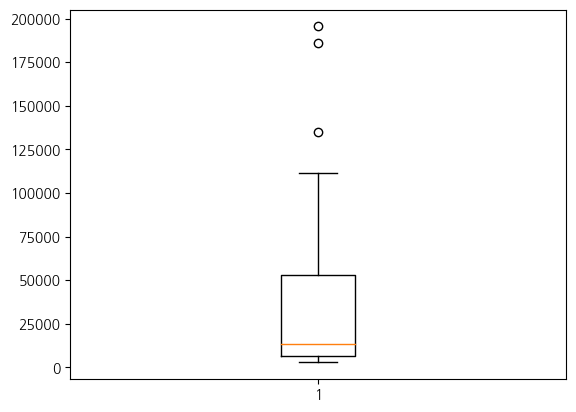

In [ ]:
# nature 데이터 중 이상치를 판별하기.

plt.boxplot(nature['검색건수'])
plt.show() 

# 이상치가 발견되었습니다.
# 이상치는 Q1 - 1.5*IQR 보다 작거나 Q3 + 1.5*IQR 보다 크다면 이상치입니다.

In [ ]:
# 이상치 -> 검색량이 너무 많다 -> 혼잡도가 높다.

# Q1, Q2, Q3은 describe()에서 확인가능 

IQR = 53093 - 6737
upper_IQR = (IQR * 1.5) + 53093
upper_IQR

122627.0

In [ ]:
import numpy as np

In [ ]:
# 상위 경계값보다 크면 -> 혼잡
# 나머지 -> 보통 
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡', '보통')

nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


In [ ]:
# 사람들이 놀 수 있는 바다에 대한 순위 정보 + 교통량
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


In [ ]:
# 제주시, 사귀포시 해수욕장 비교 

j = nature[nature['시/군/구'] == '제주시']
print(j.head())

s = nature[nature['시/군/구'] == '서귀포시']
print(s.head())

      관광지명 시/군/구               도로명주소 중분류 카테고리     소분류 카테고리    검색건수 혼잡도
순위                                                                    
4   함덕해수욕장   제주시  제주 제주시 조함해안로 525-0     자연관광  자연경관(하천/해양)  195477  혼잡
6   협재해수욕장   제주시              제주 제주시     자연관광  자연경관(하천/해양)  186252  혼잡
7   이호테우해변   제주시              제주 제주시     자연관광  자연경관(하천/해양)  134970  혼잡
10  곽지해수욕장   제주시              제주 제주시     자연관광  자연경관(하천/해양)  111702  보통
22  김녕해수욕장   제주시   제주 제주시 해맞이해안로 7-6     자연관광  자연경관(하천/해양)   78488  보통
       관광지명 시/군/구                  도로명주소 중분류 카테고리     소분류 카테고리   검색건수 혼잡도
순위                                                                       
29   중문색달해변  서귀포시  제주 서귀포시 중문관광로72번길 0-0     자연관광  자연경관(하천/해양)  61889  보통
33   표선해수욕장  서귀포시                제주 서귀포시     자연관광  자연경관(하천/해양)  56866  보통
40    광치기해변  서귀포시                제주 서귀포시     자연관광  자연경관(하천/해양)  49320  보통
43   사계해수욕장  서귀포시                제주 서귀포시     자연관광  자연경관(하천/해양)  48751  보통
105   황우지해안  서귀포시                제주 서귀포시     자연관광  자연경관(하천/

In [ ]:
# 제주시 해수욕장 총 검색건수와 서귀포시 해수욕장 총 검색건수 비교
# groupby  

groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

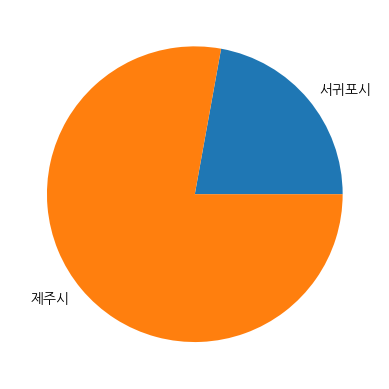

In [ ]:
# nature 검색수 안에서 제주시, 서귀포시가 어느정도 검색량을 차지하고 있는지
labels = ['서귀포시', '제주시']
plt.pie(groupby_city, labels=labels)
plt.show()

## 데이터 (region.csv)

-  지역별 코로나 데이터 

### 데이터 불러오기 

In [ ]:
region = pd.read_csv('region.csv')
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.tail()


,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
27,2020-03-28,390,114,6587,51,20,31,39,44,433,32,41,126,10,8,1285,91,8,168,9478
28,2020-03-29,410,117,6610,58,20,34,39,46,448,34,41,127,12,9,1287,94,8,189,9583
29,2020-03-30,426,118,6624,58,20,34,39,46,463,36,44,127,13,9,1298,95,9,202,9661
30,2020-03-31,450,119,6684,64,20,36,39,46,476,36,44,128,13,9,1300,96,9,217,9786
31,2020-04-01,474,122,6704,69,24,36,39,46,499,38,44,131,14,12,1302,100,9,224,9887


### 데이터 정보 확인 


In [ ]:
region.describe()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,252.875000,104.031250,5708.000000,30.468750,16.312500,22.718750,30.093750,27.750000,262.625000,28.312500,29.406250,109.937500,8.656250,5.656250,1116.750000,84.125000,4.750000,50.031250,7892.500000
std,119.194541,9.888032,1092.033587,18.268578,3.430767,6.456976,7.077267,18.949849,131.360806,5.716064,10.585624,17.586537,2.252015,2.103904,207.187308,9.338612,1.934408,76.012089,1661.291686
min,82.000000,81.000000,2569.000000,6.000000,9.000000,13.000000,17.000000,1.000000,84.000000,7.000000,11.000000,60.000000,5.000000,3.000000,514.000000,62.000000,2.000000,0.000000,3526.000000
25%,127.500000,96.000000,5523.500000,9.000000,14.750000,18.000000,24.000000,5.250000,149.250000,27.750000,24.750000,101.000000,7.000000,4.000000,1100.500000,83.000000,4.000000,0.000000,7320.000000
50%,259.000000,107.000000,6082.000000,30.500000,16.000000,22.000000,28.000000,40.000000,246.500000,29.000000,31.000000,115.000000,7.000000,5.000000,1166.500000,85.500000,4.000000,5.000000,8278.000000
75%,337.250000,111.250000,6445.500000,41.250000,19.000000,24.000000,36.250000,42.500000,371.250000,30.250000,38.000000,120.750000,10.000000,6.500000,1258.250000,90.000000,4.500000,75.500000,9062.000000
max,474.000000,122.000000,6704.000000,69.000000,24.000000,36.000000,39.000000,46.000000,499.000000,38.000000,44.000000,131.000000,14.000000,12.000000,1302.000000,100.000000,9.000000,224.000000,9887.000000


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     32 non-null     object
 1   서울      32 non-null     int64 
 2   부산      32 non-null     int64 
 3   대구      32 non-null     int64 
 4   인천      32 non-null     int64 
 5   광주      32 non-null     int64 
 6   대전      32 non-null     int64 
 7   울산      32 non-null     int64 
 8   세종      32 non-null     int64 
 9   경기      32 non-null     int64 
 10  강원      32 non-null     int64 
 11  충북      32 non-null     int64 
 12  충남      32 non-null     int64 
 13  전북      32 non-null     int64 
 14  전남      32 non-null     int64 
 15  경북      32 non-null     int64 
 16  경남      32 non-null     int64 
 17  제주      32 non-null     int64 
 18  검역      32 non-null     int64 
 19  총확진자수   32 non-null     int64 
dtypes: int64(19), object(1)
memory usage: 5.1+ KB


In [ ]:
region.isna().sum()

day      0
서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

### 데이터 전처리 

In [ ]:
# 인덱스 설정 

region = region.set_index('day')

# datetime 설정

region.index = pd.to_datetime(region.index, format='%Y-%m-%d')


In [ ]:
region.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0 KB


### 데이터 탐색 

In [ ]:
# 기존 데이터에서 총 확진자수 열을 분리하기 
# loc[인덱스, 컬럼] -> 특정 값
# 지역별 코로나 감염자 수 
cities = region.loc[:, region.columns[:-1]]

In [ ]:
cities.columns

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

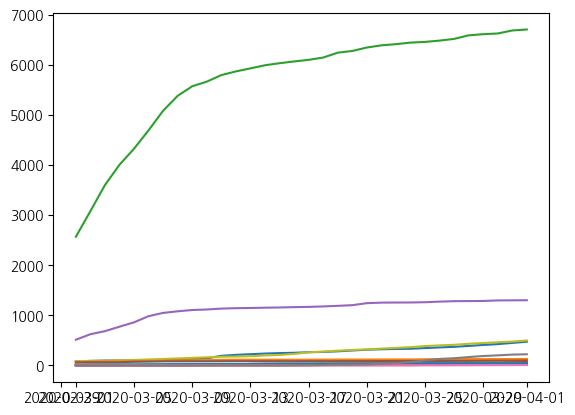

In [ ]:
# 지역별 코로나 감염자 수 시각화
# 라인 그래프

plt.plot(cities.index, cities)
plt.show()

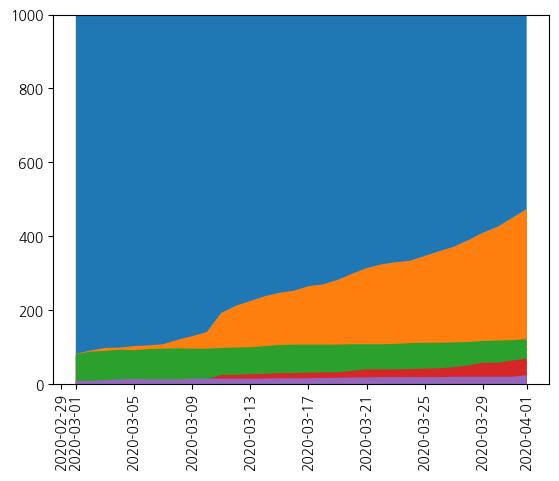

'\n축 범위: 최소값, 최대값\n'

In [ ]:
# 지역별 코로나 감염자 수 시각화
# 누적 그래프 

# 시간 흐름에 따른 확진자 수 누적 그래프
# plt.stackplot(x, y1, y2, y3 , ... , labels=)
y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']
labels = ['서울', '대구', '부산', '인천', '광주']
colors = ['red', 'black']

# 누적 그래프 -> 어떤 게 누적될 것인지 -> 시간 순에 따라 정렬
# 쌓이는 방향, 시간순에 따라 쌓이는 부분 -> 각 지역별 데이터마다 누적 확인
plt.xticks(rotation=90)
plt.stackplot(cities.index, y2)
plt.stackplot(cities.index, y1)
plt.stackplot(cities.index, y3)
plt.stackplot(cities.index, y4)
plt.stackplot(cities.index, y5)

# 그래프 범위 설정
# plt.xlim([])
plt.ylim([0, 1000])
# plt.axis([x최소, x최대, y최소, y최대])

# plt.legend(loc='upper left')
plt.show()

'''
축 범위: 최소값, 최대값
'''

In [ ]:
# 총 확진자 수 
total = region.loc[:, '총확진자수']
total.head()

day
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
Name: 총확진자수, dtype: int64

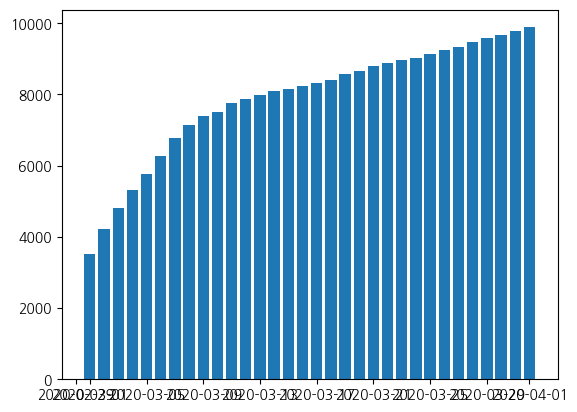

In [ ]:
# 총 확진자 수 시각화

plt.bar(total.index, total)
plt.show()

In [ ]:
# 제주 지역 확진자 

jeju = region['제주']

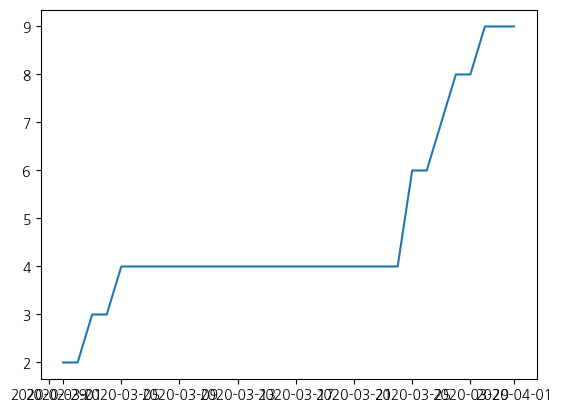

In [ ]:
# 제주 지역 확진자 시각화

# 라인 그래프 

plt.plot(jeju)
plt.show()

In [ ]:
# annotation 그래프안에 표시를 하는 코드 
# plt.annotate('string', xy=(x, y), xytext=(), arrowpropes=())
# plt.annotate('변화', xy=(27, 6), xytext=(28, 6), arrowprops=dict(arrowstyle='o'))


# datetime의 경우 matplotlib.dates의 mdates 모듈이 추가로 필요합니다.
import matplotlib.dates as mdates

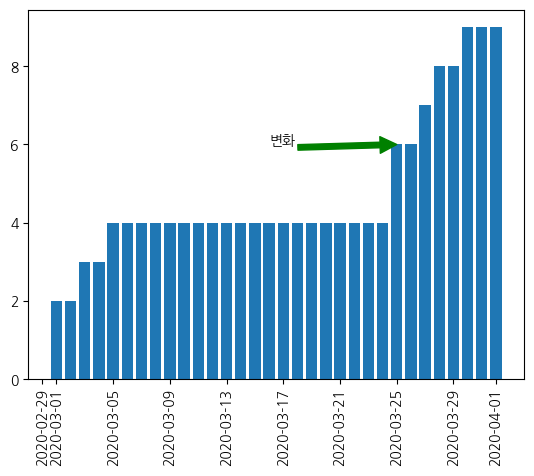

In [ ]:
# 제주 지역 확진자 시각화
# annotate 사용 


# 위에서 모듈 임포트 이후에 x값(인덱스값)을 mdates.date2num 함수를 이용해서 숫자로 바꿔주면
# annotation 기능을 사용할 수 있습니다.

# 데이터 시각화 -> 어떤 구간에 (큰)변화가 있는 지

plt.xticks(rotation=90)
plt.annotate('변화', xy=(mdates.date2num(jeju.index[24]), 6), xytext=(mdates.date2num(jeju.index[15]), 6), arrowprops={'color':'green'})
plt.bar(jeju.index, jeju)

plt.show()


## 변화폭을 민감하게 살펴보자
# 마스크 해지 -> 감염이 얼마 증가 감소
# 코로나, 폐렴, 독감


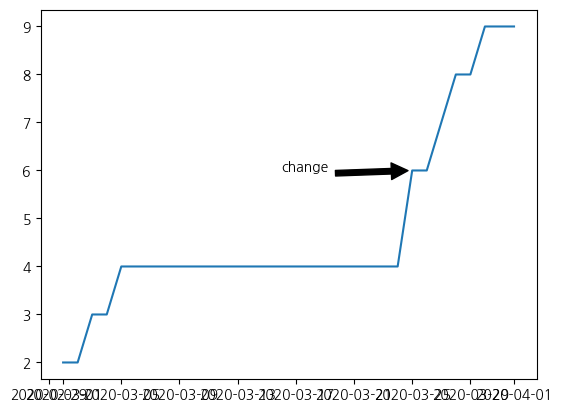

In [ ]:
plt.annotate('change', xy=(mdates.date2num(jeju.index[24]), 6), xytext=(mdates.date2num(jeju.index[15]), 6),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(jeju)
plt.show()

### 지역별 데이터를 지도에 표시

- folium 라이브러리 


In [ ]:
# 코로나 지역별 데이터
# 지역명 -> 실제 좌표의 위치
# 좌표 데이터 -> 시청, 도청 -> 위도, 경도
loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

In [ ]:
# 위도: latitude, 경도: longitude
loc = pd.DataFrame(loc).T
loc.columns = ['lat', 'lon']
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [ ]:
# 지도 관련 라이브러리
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 지도 객체 사용을 위한 라이브러리 설치 
import folium

In [ ]:
# folium의 Map 객체 생성
map_osm = folium.Map(location=[33.361701, 126.511657], zoom_start=7)
map_osm

In [ ]:
# 지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언
marker_cluster = MarkerCluster().add_to(map_osm)

#33.361701	126.511657
# folium.Marker([위도, 경도], popup=, icon=folium.Icon(color='red', icon='start)).add_to(marker_cluster)
jeju = [33.361701, 126.511657]
folium.Marker(jeju, popup=jeju, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osm

In [ ]:
# 각 지역별로 마커찍기
# 지역별 확진자 합계 (3월) 데이터 프레임 
# folium.Marker([위도, 경도], popup= 지역의 확진자 합, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
# for문으로 이용해보자.

In [ ]:
!pip install folium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
korea_coords = [37, 127]
map_osm = folium.Map(korea_coords, zoom_start=8)

from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(map_osm)

for i in loc.index:
    coords = list(loc.loc[i])
    folium.Marker(coords, popup=f'{i}:{coords}', icon=folium.Icon(color='blue', icon='star')).add_to(marker_cluster)

map_osm

## 데이터 (total_.csv)

- 3월 코로나 한국 데이터 

### 데이터 불러오기

In [ ]:
kr = pd.read_csv('total_.csv')
kr.head()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
0,2020-03-01,96985,3526,30,3479,17,32422,61037
1,2020-03-02,109591,4212,31,4159,22,33799,71580
2,2020-03-03,125851,4812,34,4750,28,35555,85484
3,2020-03-04,136707,5328,41,5255,32,28414,102965
4,2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
kr.tail()


### 데이터 정보 확인


In [ ]:
kr.describe()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,272659.468750,7892.531250,1952.28125,5851.031250,86.062500,18708.312500,246058.656250
std,96168.245376,1661.299996,1962.49330,1213.763847,44.247061,5765.846459,99218.729994
min,96985.000000,3526.000000,30.00000,3479.000000,17.000000,13531.000000,61037.000000
25%,194593.000000,7320.000000,157.00000,4728.750000,50.750000,15384.750000,169335.500000
50%,280610.000000,8278.500000,1269.00000,5984.500000,78.000000,16738.500000,256201.000000
75%,350910.500000,9062.000000,3562.75000,6971.500000,121.500000,18749.000000,326699.000000
max,421547.000000,9887.000000,5567.00000,7470.000000,165.000000,35555.000000,395075.000000


In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    32 non-null     object
 1   총계      32 non-null     int64 
 2   확진자     32 non-null     int64 
 3   격리해제    32 non-null     int64 
 4   격리중     32 non-null     int64 
 5   사망      32 non-null     int64 
 6   검사중     32 non-null     int64 
 7   결과 음성   32 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.1+ KB


In [ ]:
kr.isna().sum()

date     0
총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

### 데이터 전처리 

In [ ]:
# 인덱스 설정 
kr = kr.set_index('date')

# 인덱스 타입 변경 datetime
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')


In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


### 데이터 탐색

In [ ]:
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
# 데이터 중 컬럼들이 서로 상관성이 있거나 반대 성향(경향)이 있으면 서로 비교 -> 상관관계, 상관계수 등등 이용

# 확진자 (양성) vs 미감염자(음성)
pos = kr['확진자']
neg = kr['결과 음성']


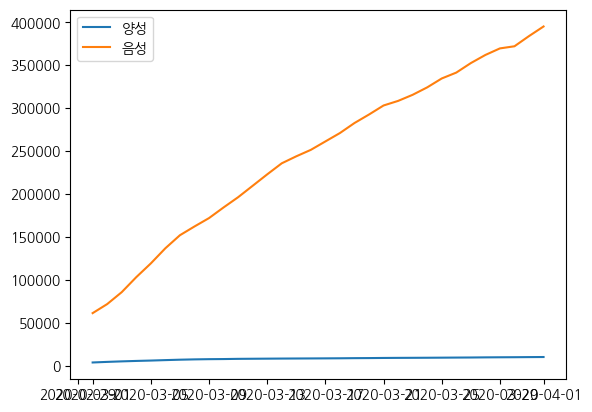

In [ ]:
# 양성과 음성의 시각화

# 라인 그래프

plt.plot(pos, label = '양성')
plt.plot(neg, label = '음성')
plt.legend(loc='best')
plt.show()

# 양성의 증가폭은 음성의 증가폭보다 현저히 낮다.


In [ ]:
# 사망율(치명율) 구하기 

# 확진자 수 중 사망 -> 사망율 , 치명율
# 확진자 수 : pos 

death = kr['사망']

d_p = round((death / pos) * 100, 2)
d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

In [ ]:
# 완치율 구하기 

# 확진자 수 중 격리해제의 수 -> 완치율 
# 확진자 수: pos
rec = kr['격리해제']

r_p = round((rec / pos) * 100, 2)
r_p.head()

date
2020-03-01    0.85
2020-03-02    0.74
2020-03-03    0.71
2020-03-04    0.77
2020-03-05    1.53
dtype: float64

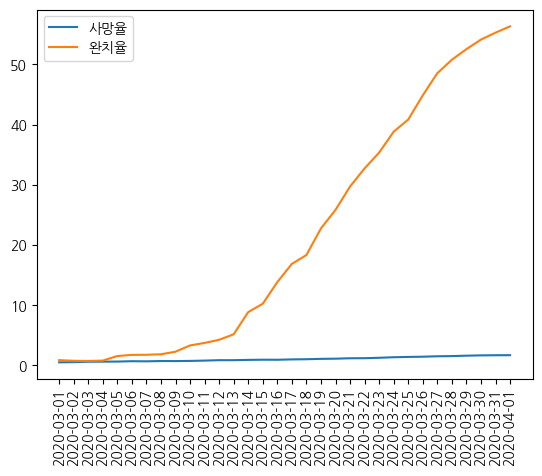

In [ ]:
# 사망율(치명율)과 완치율 의 시각화 

plt.plot(d_p, label = '사망율')
plt.plot(r_p, label = '완치율')
plt.xticks(d_p.index, rotation=90)
plt.legend(loc='best')
plt.show()

# 그래프로 그려봤을 때 완치율이 눈에 띄게(유의미하게) 증가 

In [ ]:
# 3월 데이터
# 사망율, 완치율 -> 파이

# 4월 데이터
# 사망율, 완치율 -> 파이

In [ ]:
# 사망율과 완치율을 표현 가능

# 시계열 데이터 -> 흐름, 변화

### 상반되는 데이터의 시각화

In [ ]:
# 상반되는 데이터의 시각화 

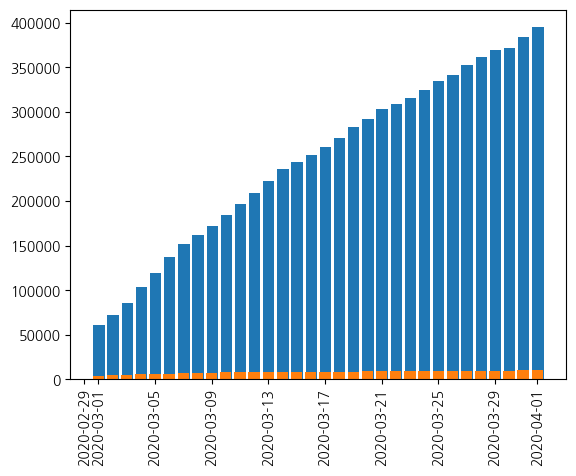

In [ ]:
# 양성 음성 -> 반대되는 데이터
# 가로(x):시간,  세로(y): 수
# 가로: 비교할 데이터 -> 양성, 음성
# 추가 설명: index(datetime) + timedelta

# np.timedelta64(시간, ('h','m','s'))
w = np.timedelta64(60, 'm')

plt.xticks(rotation=90)
plt.bar(neg.index + w, neg)
plt.bar(pos.index, pos)

plt.show()

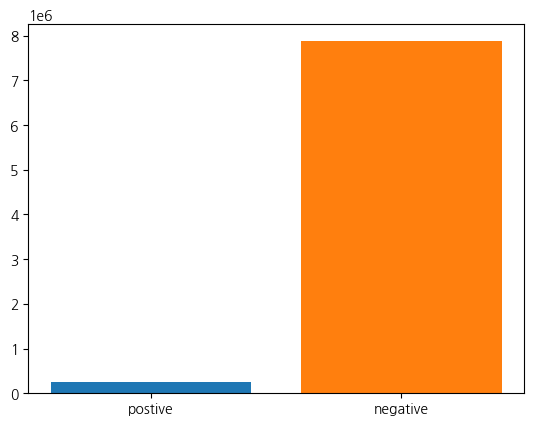

In [ ]:
# 양성(총 합), 음성(총 합)
sum_p = pos.sum()
sum_n = neg.sum()

# 몇 명 -> 합
plt.bar('postive', sum_p)
plt.bar('negative', sum_n)
plt.show() # 비교되는 두 가지는 딱 두 가지가 시각적으로 들어오게

### 경향성 시각화 

In [ ]:
# 경향성 시각화 

In [ ]:
# 사망자 수
death.head()

# 치명율
d_p.head()

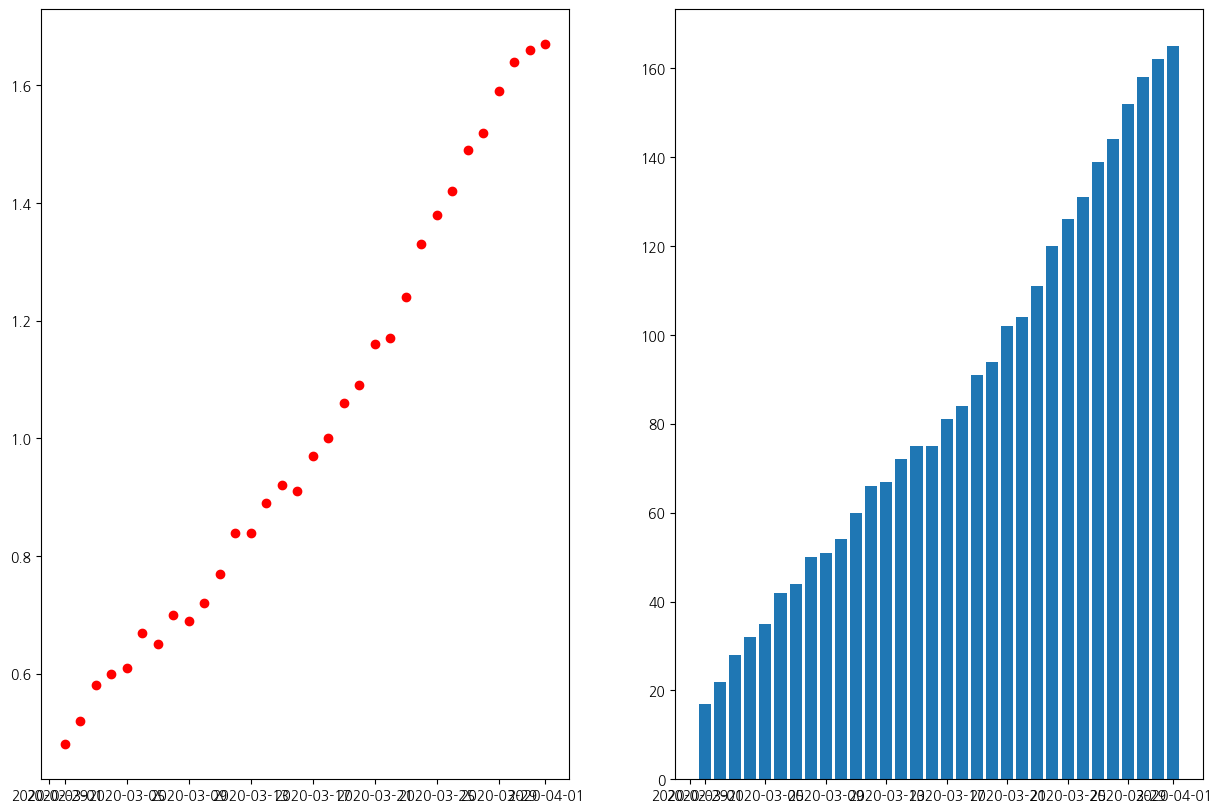

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(d_p, 'or')

plt.subplot(1, 2, 2)
plt.bar(death.index, death)

plt.show()
# 내가 새롭게 만든 데이터가 같은 경향 -> 제대로 변환을 했다

### 비율, 전체-부분 데이터 시각화 

In [ ]:
# 비율 전체-부분 데이터 시각화 

In [ ]:
# 전체 - 부분
# 어떤 값이 전체에서 어느 정도 차지하고 있느냐

# 시계열 -> 변화, 흐름
# 1. 경향(성) -> 크게 변화는 시점 (상승, 하강, 반복)
# 2. 비율 -> 시간에 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지: 흐름, 변화


# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별
# 격리중, 격리 해제 비율
# 검사 중 양성, 음성 비율
# 주말 전후 양성 비율 변화
# 주말 전후 검사량 변화

In [ ]:
# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별

print(death.head()) # '사망'
print(rec.head())   # '격리해제'

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.bar(death.index, death)
# d_p

plt.subplot(1, 2, 2)
plt.bar(rec.index, rec)
# r_p
plt.show()

In [ ]:
# 치명율, 완치율
# 확진자
plt.subplot(1, 2, 1)
# plt.bar(pos.index, pos)
plt.plot(pos)


plt.subplot(1, 2, 2)
plt.plot(d_p)
plt.plot(r_p)

plt.show()
# 확진자는 계속 증가한다.
# 사망, 격리해제 증가
# 확진자 증가하는 경향, 완치자(격리해제)가 증가하는 경향이 훨씬 유사하다.

## -> 정규화, 일반화: 분산, 표준편차, 정규분포 ... 